https://diffractio.readthedocs.io/en/latest/usage.html#xy-fields

In [3]:
from diffractio import um, nm, mm, np, degrees
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY

screeninfo not imported.
cv2 not imported. Function send_image_screen cannot be used


(<Figure size 500x500 with 1 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x1ffc8b48880>)

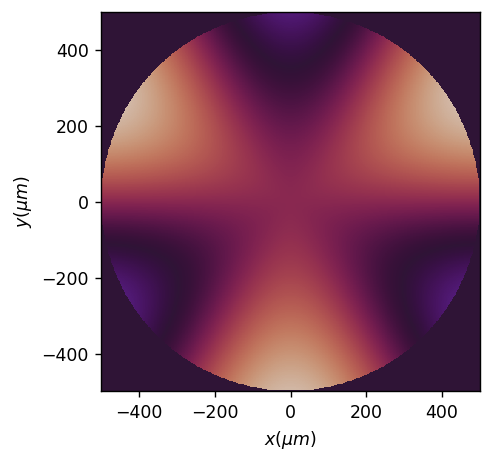

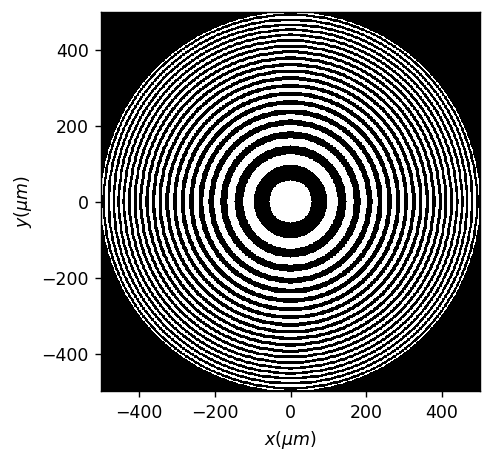

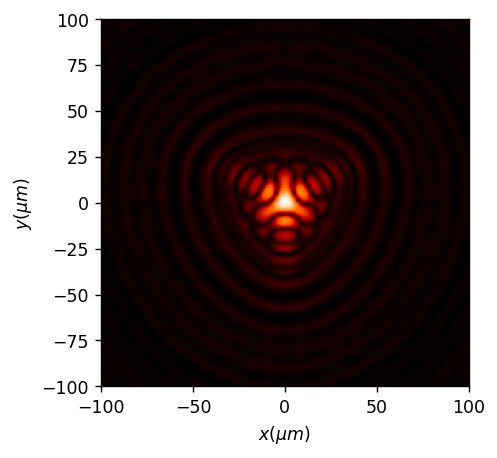

In [4]:
length = 1000*um
x0 = np.linspace(-length/2, length/2, 512)
y0 = np.linspace(-length/2, length/2, 512)
wavelength = 0.6238 * um

focus=10*mm


u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)

u0.zernike_beam(A=1, r0=(0, 0), radius=length / 2, n=[ 0,4,], m=[0,3,], c_nm=[ 1,0.25,], mask=True)
u0.draw(kind='phase', filename='xy_source.png')

t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t0.fresnel_lens(
  r0=(0 * um, 0 * um),
  radius=(500 * um, 500 * um),
  focal=(focus,focus),
  angle=0 * degrees,
  mask=True,
  kind='amplitude',
  phase=np.pi)
t0.draw(filename='xy_mask.png')

u1 = u0 * t0
u2 = u1.RS(z=focus, new_field=True)
u2.cut_resample(
  x_limits=(-100 * um, 100 * um),
  y_limits=(-100 * um, 100 * um),
  num_points=[1024, 1024],
  new_field=False)
u2.draw(kind='intensity', logarithm=True, filename='xy_RS.png')